# FIT3164 Data Science Project

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

## Import data

In [2]:

from pathlib import Path  
df_true= pd.read_csv("./data/cleaned_actual.csv")
df_pred= pd.read_csv("./data/cleaned_forecasts.csv")
df_pred
df_true = df_true.rename(columns={"Time": 'time', 
                                 "Load (kW)": "load_kw_true", 
                                 "Pressure_kpa": "pres_kpa_true",
                                 'Cloud Cover (%)': 'cld_pct_true',
                                 'Humidity (%)': 'hmd_pct_true',
                                 'Temperature (C)': 'temp_c_true',
                                 'Wind Direction (deg)': 'wd_deg_true',
                                 'Wind Speed (kmh)':'ws_kmh_true'})
df_pred = df_pred.rename(columns={"Time": 'time', 
                                 "Pressure (kpa)": "pres_kpa_pred",
                                 'Cloud Cover (%)': 'cld_pct_pred',
                                 'Temperature (C)': 'temp_c_pred',
                                 'Wind Direction (deg)': 'wd_deg_pred',
                                 'Wind Speed (kmh)':'ws_kmh_pred'})
result = pd.merge(df_true, df_pred, on="time")
result['time']= pd.to_datetime(result['time'])
result = result.set_index('time')
result.head()


#filepath = Path('./data/data_cleaned.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#result.to_csv(filepath)  


,load_kw,pressure_kpa_x,cloud_cover_pct_x,humidity_pct,temperature_c_x,wind_direction_deg_x,wind_speed_kmh_x,temperature_c_y,pressure_kpa_y,cloud_cover_pct_y,wind_direction_deg_y,wind_speed_kmh_y
time,,,,,,,,,,,,
2017-03-18 00:00:00+00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,14.0,1011.0,3.0,307.0,2.0
2017-03-18 01:00:00+00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,14.0,1011.0,4.0,215.0,2.0
2017-03-18 02:00:00+00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,14.0,1011.0,4.0,123.0,1.0
2017-03-18 03:00:00+00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,14.0,1011.0,4.0,31.0,1.0
2017-03-18 04:00:00+00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,14.0,1011.0,4.0,138.0,1.0


## Inspect data

In [3]:
#df = pd.read_csv("./data/data_cleaned.csv")
df = result 
#df = df.set_index('time')
df

,load_kw,pressure_kpa_x,cloud_cover_pct_x,humidity_pct,temperature_c_x,wind_direction_deg_x,wind_speed_kmh_x,temperature_c_y,pressure_kpa_y,cloud_cover_pct_y,wind_direction_deg_y,wind_speed_kmh_y
time,,,,,,,,,,,,
2017-03-18 00:00:00+00:00,1.031472e+06,1012.48000,2.125,79.333333,16.764386,285.25,6.25375,14.00,1011.0,3.0,307.0,2.0
2017-03-18 01:00:00+00:00,1.007206e+06,1011.61875,0.000,82.166667,15.729386,285.00,9.20500,14.00,1011.0,4.0,215.0,2.0
2017-03-18 02:00:00+00:00,9.861084e+05,1010.72000,2.125,81.666667,15.816886,316.00,11.28375,14.00,1011.0,4.0,123.0,1.0
2017-03-18 03:00:00+00:00,9.707610e+05,1011.37625,17.125,82.250000,15.919386,327.00,7.16875,14.00,1011.0,4.0,31.0,1.0
2017-03-18 04:00:00+00:00,9.622584e+05,1011.50000,18.625,82.333333,15.769386,282.25,0.78000,14.00,1011.0,4.0,138.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 03:00:00+00:00,9.774149e+05,1012.07500,29.750,82.500000,7.626886,91.25,10.65750,9.72,1012.0,7.0,6.0,11.0
2021-01-31 04:00:00+00:00,9.717784e+05,1012.17500,24.250,84.666667,5.946886,30.00,2.90000,9.72,1013.0,7.0,8.0,10.0
2021-01-31 05:00:00+00:00,9.738789e+05,1012.35000,24.250,84.666667,5.661886,44.00,2.72750,9.72,1013.0,7.0,10.0,9.0


In [4]:
#df.to_csv("./data/data_cleaned.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33968 entries, 2017-03-18 00:00:00+00:00 to 2021-01-31 07:00:00+00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   load_kw               33968 non-null  float64
 1   pressure_kpa_x        33968 non-null  float64
 2   cloud_cover_pct_x     33968 non-null  float64
 3   humidity_pct          33968 non-null  float64
 4   temperature_c_x       33968 non-null  float64
 5   wind_direction_deg_x  33968 non-null  float64
 6   wind_speed_kmh_x      33968 non-null  float64
 7   temperature_c_y       33863 non-null  float64
 8   pressure_kpa_y        33863 non-null  float64
 9   cloud_cover_pct_y     33863 non-null  float64
 10  wind_direction_deg_y  33863 non-null  float64
 11  wind_speed_kmh_y      33863 non-null  float64
dtypes: float64(12)
memory usage: 3.4 MB


In [6]:
df['load_kw'].mean()

1148848.930168323

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
load_kw,33968.0,1.148849e+06,148691.956115,845471.358100,1.029790e+06,1.112285e+06,1.250339e+06,1.605192e+06
pressure_kpa_x,33968.0,1.009398e+03,3.984576,950.595000,1.006300e+03,1.009883e+03,1.012388e+03,1.022915e+03
cloud_cover_pct_x,33968.0,4.011727e+01,32.376072,0.000000,8.875000e+00,4.087500e+01,7.500000e+01,1.000000e+02
humidity_pct,33968.0,7.970970e+01,11.294890,33.333333,7.216667e+01,8.166667e+01,8.875000e+01,1.000000e+02
temperature_c_x,33968.0,1.674289e+01,5.766937,-6.418114,1.344376e+01,1.669439e+01,2.052251e+01,3.906689e+01
wind_direction_deg_x,33968.0,2.096019e+02,94.384439,0.000000,1.267500e+02,2.391250e+02,2.853750e+02,3.575000e+02
wind_speed_kmh_x,33968.0,1.271407e+01,6.642436,0.000000,7.664688e+00,1.197875e+01,1.774687e+01,9.149750e+01
temperature_c_y,33863.0,1.642339e+01,4.774614,-40.000000,1.400000e+01,1.600000e+01,2.000000e+01,3.400000e+01
pressure_kpa_y,33863.0,1.009269e+03,3.880350,994.000000,1.006000e+03,1.010000e+03,1.012000e+03,1.020000e+03
cloud_cover_pct_y,33863.0,2.856548e+01,30.698492,0.000000,2.000000e+00,1.300000e+01,5.600000e+01,1.000000e+02


<Axes: >

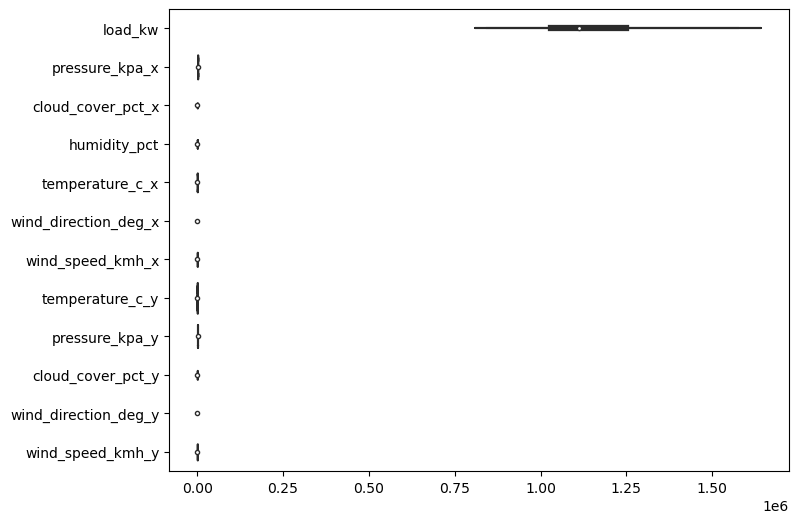

In [8]:
sns.violinplot(df, orient="h", palette="Blues")

In [9]:
#plt.figure(figsize=(12,4))
#plt.plot(df["load_kw_true"])

<Axes: >

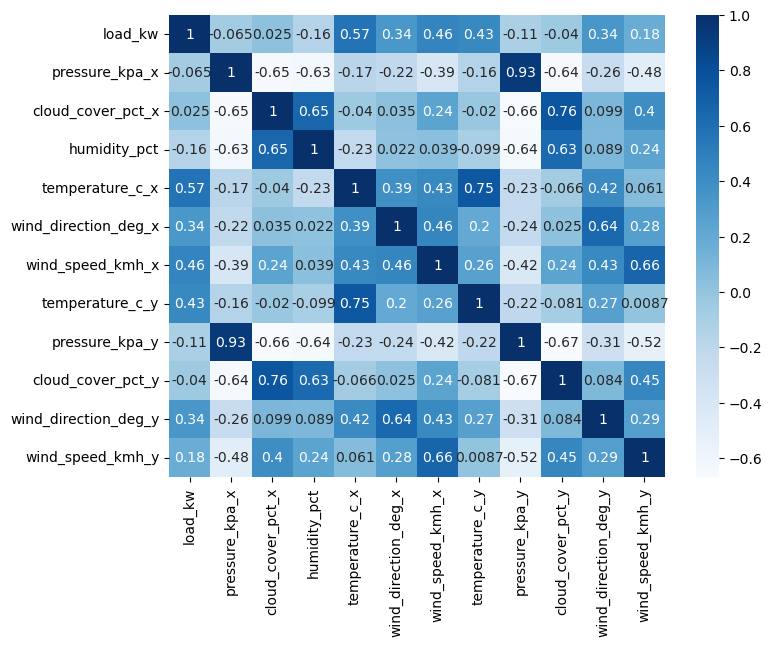

In [10]:
sns.heatmap(df.corr(), cmap="Blues", annot=True) #correlationship

### Z-Score (Standardization)

In [11]:
df_std=(df-df.mean())/df.std() #mean normalization

In [12]:
df_std

,load_kw,pressure_kpa_x,cloud_cover_pct_x,humidity_pct,temperature_c_x,wind_direction_deg_x,wind_speed_kmh_x,temperature_c_y,pressure_kpa_y,cloud_cover_pct_y,wind_direction_deg_y,wind_speed_kmh_y
time,,,,,,,,,,,,
2017-03-18 00:00:00+00:00,-0.789399,0.773360,-1.173468,-0.033322,0.003728,0.801489,-0.972582,-0.507557,0.446141,-0.832793,0.979663,-1.586304
2017-03-18 01:00:00+00:00,-0.952596,0.557214,-1.239103,0.217529,-0.175743,0.798840,-0.528280,-0.507557,0.446141,-0.800218,0.011503,-1.586304
2017-03-18 02:00:00+00:00,-1.094481,0.331657,-1.173468,0.173261,-0.160570,1.127284,-0.215330,-0.507557,0.446141,-0.800218,-0.956656,-1.720489
2017-03-18 03:00:00+00:00,-1.197697,0.496354,-0.710163,0.224907,-0.142797,1.243829,-0.834832,-0.507557,0.446141,-0.800218,-1.924816,-1.720489
2017-03-18 04:00:00+00:00,-1.254880,0.527412,-0.663832,0.232285,-0.168807,0.769704,-1.796640,-0.507557,0.446141,-0.800218,-0.798804,-1.720489
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 03:00:00+00:00,-1.152947,0.671718,-0.320214,0.247041,-1.580735,-1.253935,-0.309610,-1.403965,0.703849,-0.702493,-2.187902,-0.378640
2021-01-31 04:00:00+00:00,-1.190855,0.696815,-0.490093,0.438868,-1.872051,-1.902877,-1.477480,-1.403965,0.961558,-0.702493,-2.166856,-0.512825
2021-01-31 05:00:00+00:00,-1.176728,0.740734,-0.490093,0.438868,-1.921470,-1.754547,-1.503449,-1.403965,0.961558,-0.702493,-2.145809,-0.647010


<Axes: >

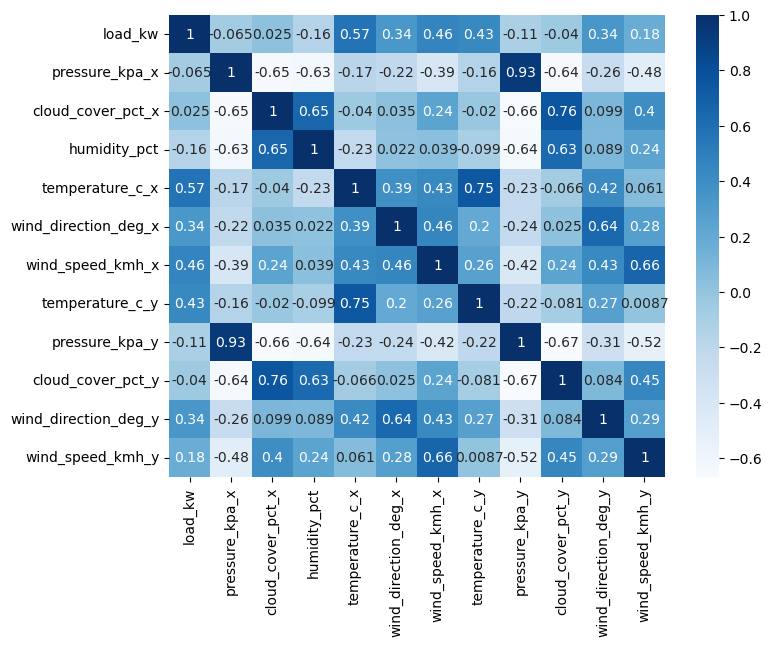

In [13]:
sns.heatmap(df_std.corr(), cmap="Blues", annot=True)

<Axes: >

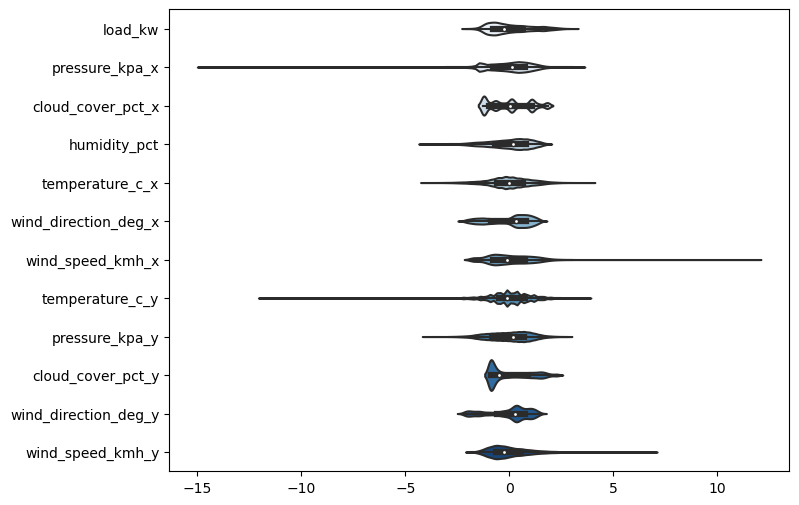

In [14]:
sns.violinplot(df_std, orient="h", palette="Blues")

In [15]:
#***need to remove outliers?

### Split Data Frame

In [16]:
df_denorm=df
df = df_std[['load_kw']]
#df = df_std[['load_kw_true', 'Temperature (C) ', 'Wind Speed (kmh)']]

In [17]:
#data after 20th June 2020
"""
column_indices = {name: i for i, name in enumerate(df.columns)}
df = df[int(len(df)*0.85):]
n = len(df)

train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
"""

'\ncolumn_indices = {name: i for i, name in enumerate(df.columns)}\ndf = df[int(len(df)*0.85):]\nn = len(df)\n\ntrain_df = df[0:int(n*0.7)]\nval_df = df[int(n*0.7):int(n*0.9)]\ntest_df = df[int(n*0.9):]\n\nnum_features = df.shape[1]\n'

In [18]:
df

,load_kw
time,
2017-03-18 00:00:00+00:00,-0.789399
2017-03-18 01:00:00+00:00,-0.952596
2017-03-18 02:00:00+00:00,-1.094481
2017-03-18 03:00:00+00:00,-1.197697
2017-03-18 04:00:00+00:00,-1.254880
...,...
2021-01-31 03:00:00+00:00,-1.152947
2021-01-31 04:00:00+00:00,-1.190855
2021-01-31 05:00:00+00:00,-1.176728


In [19]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [20]:
print(len(train_df), len(val_df), len(test_df))

23777 6794 3397


### Data Windowing

In [21]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, 
                 train_df=train_df, val_df=val_df, 
                 test_df=test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    # 2. split window
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels


    # 3. plot
    def plot(self, model=None, plot_col='load_kw', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                            marker='X', edgecolors='k', label='Predictions',
                            c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        
    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result


    # 4. make dataset
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)
        ds = ds.map(self.split_window)

        return ds


    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)




### Compile and Fit

In [22]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      patience=patience,
                                                      mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                        validation_data=window.val,
                        callbacks=[early_stopping])
    return history


In [23]:
def plot_history(H):
    x = [int(i+1) for i in range(len(H[list(H)[0]]))] 
    plt.figure(figsize=(12,4))
    plt.plot(x, H["val_loss"], label="val_loss")
    plt.plot(x, H["loss"], label="loss")
    plt.plot(x, H["val_mean_absolute_error"], label="val_mean_absolute_error")
    plt.plot(x, H["mean_absolute_error"], label="mean_absolute_error")
    plt.legend()
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))

### BASELINE

2023-09-15 10:50:44.697857: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-09-15 10:50:44.697878: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-09-15 10:50:44.697884: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-09-15 10:50:44.698027: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-15 10:50:44.698041: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-09-15 10:50:44.881320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


210/210 [==============================] - 1s 3ms/step - loss: 0.2775 - mean_absolute_error: 0.3368


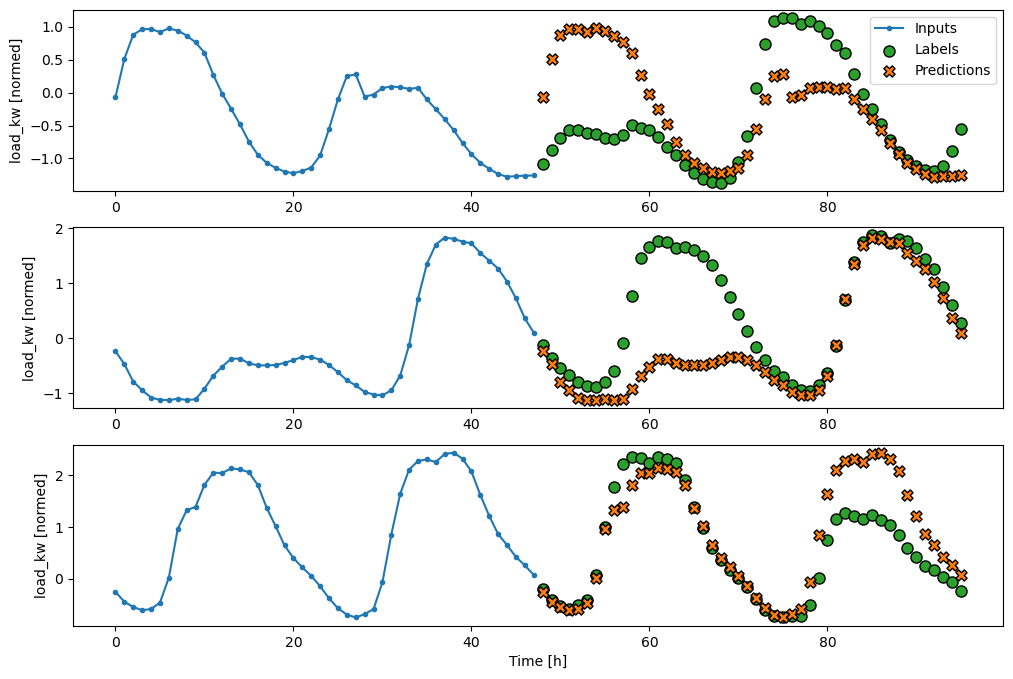

In [24]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

OUT_STEPS = 48
multi_window = WindowGenerator(input_width=48,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance ={}
multi_performance={}
multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)


### LSTM

In [25]:
#grid search
units = [64, 32]
#Nbeat, DeepAR, TFT

Input shape: (32, 168, 1)
Output shape: (32, 48, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (32, 168, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (32, 64)                  33024     
                                                                 
 dense (Dense)               (32, 48)                  3120      
                                                                 
 reshape (Reshape)           (32, 48, 1)               0         
                                                                 
Total params: 53040 (207.19 KB)
Trainable params: 53040 (207.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


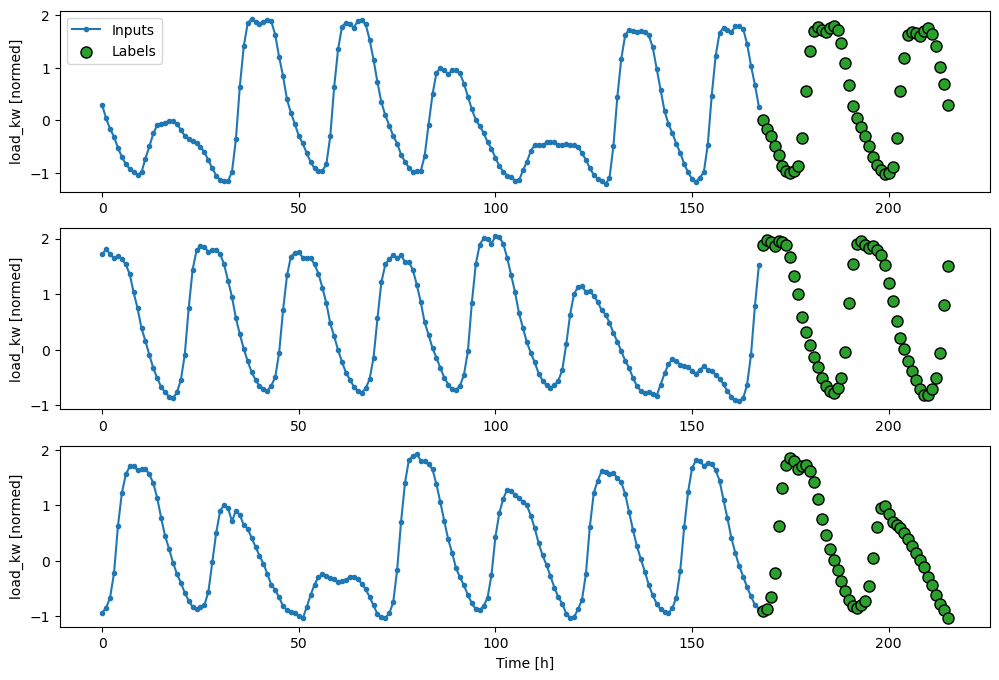

In [26]:
OUT_STEPS = 24*2
multi_window = WindowGenerator(input_width=24*7,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, label_columns=['load_kw'])
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_lstm_model(multi_window.example[0]).shape)

multi_window.plot()
multi_window
multi_lstm_model.summary()

In [27]:
MAX_EPOCHS = 20
history = compile_and_fit(multi_lstm_model, multi_window)
IPython.display.clear_output()
multi_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 168, 64)           16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 48)                3120      
                                                                 
 reshape (Reshape)           (None, 48, 1)             0         
                                                                 
Total params: 53040 (207.19 KB)
Trainable params: 53040 (207.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


206/206 [==============================] - 3s 12ms/step - loss: 0.7933 - mean_absolute_error: 0.6061


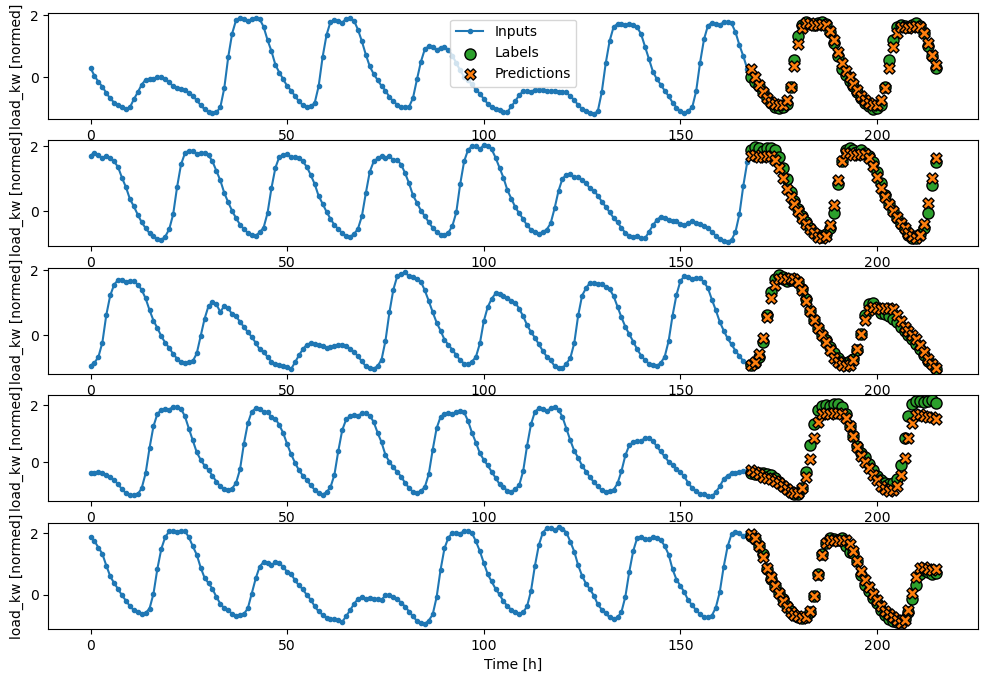

In [28]:
multi_val_performance = multi_lstm_model.evaluate(multi_window.val)
multi_performance = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model, max_subplots=5)

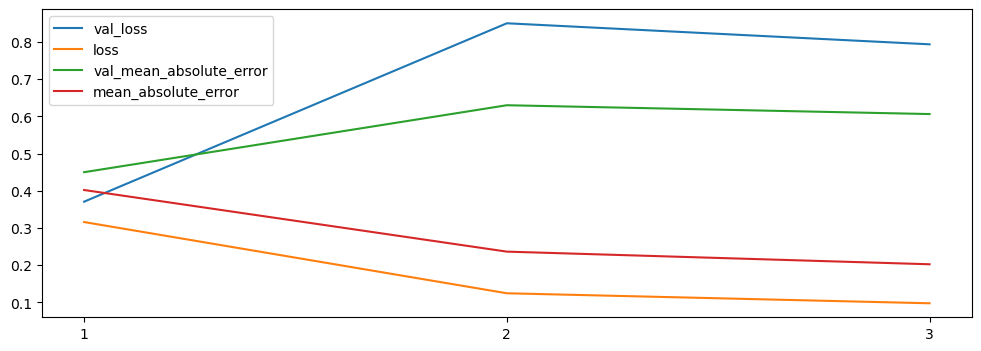

In [29]:
plot_history(history.history)

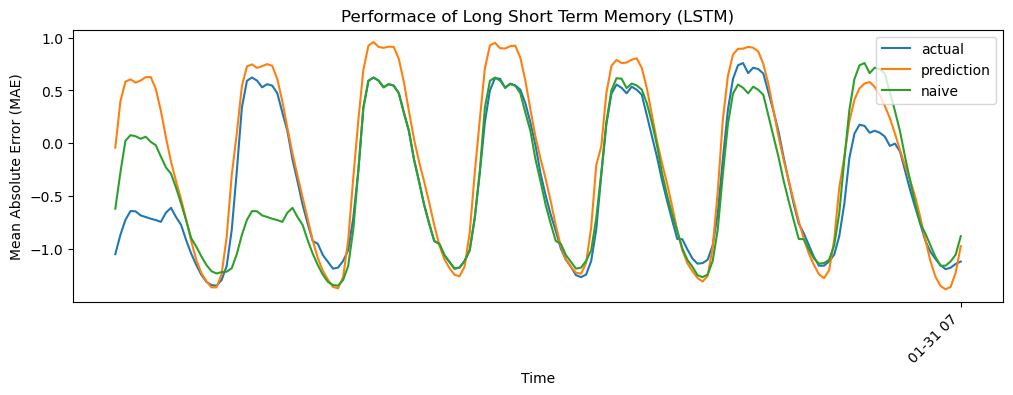

In [30]:
n_days = 7
y_actual = np.array(df[n-24*7:]).flatten()
y_pred = np.array([])
y_naive = np.array([])
for i in range(7, 0, -1):
    x = np.array(df.iloc[-i*24-7*24:-i*24]).reshape((1, 168, 1))
    y = tf.reshape(multi_lstm_model(x), (48,))[:24]
    y_pred = np.append(y_pred, y)
    y_naive = np.append(y_naive, np.array(df.iloc[-i*24-24:-i*24])) #y_naive = x of last 24 hours

plt.figure(figsize=(12,4))
x = np.array(df.index[n-24*7:])
plt.plot(x , y_actual)
plt.plot(x, y_pred)
plt.plot(x, y_naive)

plt.gca().xaxis.set_major_locator(mdates.HourLocator())
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=180))
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)

plt.xlabel('Time')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Performace of Long Short Term Memory (LSTM)')
plt.legend(['actual', 'prediction', 'naive'])

plt.show()

In [34]:
multi_performance[0]*df_denorm["load_kw"].std() + df_denorm["load_kw"].mean()

1183416.6728241788

In [31]:
# y_pred = x
mae_1 = sum(abs(y_actual-y_naive))/len(y_actual) * df_denorm["load_kw"].std()
mae_1_pct = mae_1/df_denorm["load_kw"].mean()
mae_1_pct

0.02961257489953242

In [32]:
# y_pres = mean_x
mae_2 = abs(np.array(df.iloc[-7*24-24:-7*24])-y_actual).mean()* df_denorm["load_kw"].std()
mae_2_pct = mae_2/df_denorm["load_kw"].mean()
mae_2_pct

0.09024418788013308